# Lecture 8 - Intro to Data Science 
Today we will be applying everything we have learned so far and analyze some data

## Quick Review
I forgot to cover a useful built-in function **Zip**

*   **API**: https://docs.python.org/3.3/library/functions.html#zip



In [3]:
"""
  I forgot to cover the zip function in Python
  It easily combines two lists and returns a tuple
"""

A = [1,2,3]
B = [34,87,98]

for row in zip(A,B):
  print(row)

(1, 34)
(2, 87)
(3, 98)


## What if you want the zip function to return a list?
A cheap and dirty trick is to copy and paste source code of the zip function, and modify it. You know the python sorce code has been reviced by professionals, so just modify it enough to meet your needs.

In [3]:
# I grabbed this code from https://docs.python.org/3.3/library/functions.html#zip
# I then modified it by changing the name and the result is now a list
# Don't reinvent the wheel!

def zipLists(*iterables):
    # zip('ABCD', 'xy') --> Ax By
    sentinel = object()
    iterators = [iter(it) for it in iterables]
    while iterators:
        result = []
        for it in iterators:
            elem = next(it, sentinel)
            if elem is sentinel:
                return
            result.append(elem)
        yield list(result)
        
A = [1,2,3]
B = [34,87,98]

for row in zipLists(A,B):
  print(row)

[1, 34]
[2, 87]
[3, 98]


# Python for Data Science
As I have mentioned in class, you can split data science scripts into three scripts:


1.   Accesing you Data
2.   Doing math to you Data
3.   Plotting your Data

Today we are doing all three scripts.

The data can be downloaded from: https://github.com/noobrescue/Python-Workshops/blob/master/data/TiO-Gas-Data.xlsx

The data header is: 

```
# LPG, H2, Smoke, Alcohol, CO2, Natural Gas, CO
```

Each one represesnts different gas sensor data.

### Accessing your data
This is the standard code to import data on CoLab from your Google Drive.

In [0]:
!pip install --upgrade -q gspread

In [0]:
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

worksheet = gc.open('TiO-Gas-Data').sheet1

# get_all_values gives a list of rows.
excelFile = worksheet.get_all_values()
print(excelFile)

# Convert to a DataFrame and render.
# import pandas as pd
# pd.DataFrame.from_records(rows)

**Output**

```
[['0', '1', '91', '24', '521', '0', '0', '0'], ['0', '1', '91', '24', '521', '7', '0', '0'], ...] 
```



## Doing Math to your Data

In [0]:
import numpy as np
from scipy import signal

# LPG, H2, Smoke, Alcohol, CO2, Natural Gas, CO

# empty lists to store values
LPG = []
H2 = []
Smoke = []
Alcohol = []
CO2 = []
NaturalGas = []
CO = []

# for row in excelFile: 
# gives us all the data in the excelFile, 
# but we cut it off at 7000 because thats when the experiment ends

for row in excelFile[0:7000]:
  LPG.append(row[0])
  H2.append(row[1])
  Smoke.append(row[2])
  Alcohol.append(row[3])
  CO2.append(row[4])
  NaturalGas.append(row[5])
  CO.append(row[6])
  
#print(LPG)

# create a function that applies math to the data
def prepData(aList):
  aList = np.array(aList,int)
  aList = np.clip(aList,0,10000)
  
  # for data smoothing (remove noise)
  # API: https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.signal.savgol_filter.html
  aList = signal.savgol_filter(aList,81,3) 
  return aList


# pass our data through our math function and save result
LPG = prepData(LPG)
H2 = prepData(H2)
Smoke = prepData(Smoke)
Alcohol = prepData(Alcohol)
CO2 = prepData(CO2)
NaturalGas = prepData(NaturalGas)
CO = prepData(CO)



## Plotting your Data
We will use Matplotlib to display our data. This is the industry standard for plotting data.

*   **Info**: https://matplotlib.org/
*   **Tutorials**: https://matplotlib.org/tutorials/index.html

A newer library is (but make sure to learn matplotlib too):

*   **Info**: https://plot.ly/
*   **Tutorials**: https://plot.ly/python/





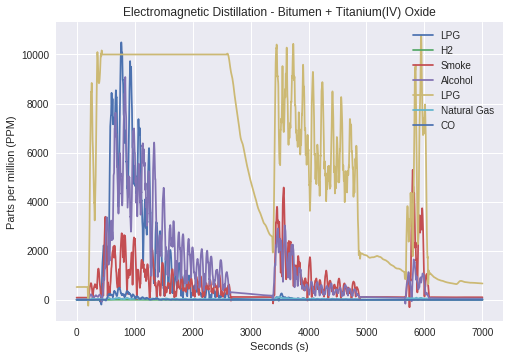

In [32]:
import matplotlib.pyplot as plt
import numpy as np

x = len(LPG)
#print(x)

# create our x-axis 
xAxis = np.linspace(0,x,x)

# LPG, H2, Smoke, Alcohol, CO2, Natural Gas, CO

# plot our data
# if you want to style it, then read the matplotlib API
# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html

# matplotlib.pyplot.plot(xAxis, LPG, label='LPG')

plt.plot(xAxis, LPG, label='LPG')
plt.plot(xAxis, H2, label='H2')
plt.plot(xAxis, Smoke, label='Smoke')
plt.plot(xAxis, Alcohol, label='Alcohol')
plt.plot(xAxis, CO2, label='LPG')
plt.plot(xAxis, NaturalGas, label='Natural Gas')
plt.plot(xAxis, CO, label='CO')

plt.title('Electromagnetic Distillation - Bitumen + Titanium(IV) Oxide')
plt.xlabel('Seconds (s)')
plt.ylabel('Parts per million (PPM)')

plt.legend()
plt.show()

# Conclusion
After stylizing your plot, you should have a graph like this:

![TiO-Gas](https://image.ibb.co/bTPUiA/TiO-Gas.png)

Now it is up to us to interpret the significance of the results.